In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv("preprocess.csv",
                  encoding ='ISO-8859-1')

In [20]:
data.head(10)

,Unnamed: 0,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp
0,0,2016-12-30 22:18:18,84254,814958820980039680,False,23213,Twitter for Android,Russians are playing @CNN and @NBCNews for suc...,fool funny watch clue totally
1,1,2016-12-30 19:46:55,25336,814920722208296960,False,7366,Twitter for iPhone,"Join @AmerIcan32, founded by Hall of Fame lege...",hall fame legend
2,2,2016-12-30 19:41:33,97669,814919370711461888,False,34415,Twitter for Android,Great move on delay (by V. Putin) - I always k...,move delay v always knew smart
3,3,2016-12-29 14:54:21,45609,814484710025994240,False,11330,Twitter for iPhone,My Administration will follow two simple rules...,administration follow two simple rule
4,4,2016-12-28 22:06:28,51857,814231064847728640,False,13919,Twitter for iPhone,'Economists say Trump delivered hope' https://...,say hope
5,5,2016-12-28 14:25:11,117710,814114980983427072,False,34542,Twitter for Android,not anymore. The beginning of the end was the ...,beginning end horrible deal un stay strong fast
6,6,2016-12-28 14:19:46,106626,814113616110751744,False,30237,Twitter for Android,We cannot continue to let Israel be treated wi...,cannot continue let total disrespect used friend
7,7,2016-12-28 14:07:13,117900,814110460761018368,False,31799,Twitter for Android,Doing my best to disregard the many inflammato...,best many statement thought going transition
8,8,2016-12-28 03:10:07,78521,813945096269860864,False,19159,Twitter for Android,The U.S. Consumer Confidence Index for Decembe...,consumer confidence nearly four point highest ...
9,9,2016-12-27 21:52:29,99838,813865160163098624,False,23222,Twitter for Android,President Obama campaigned hard (and personall...,hard personally important swing state lost voter


In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [22]:
vader.polarity_scores('cannot continue let total disrespect used friend')

{'compound': 0.1027, 'neg': 0.255, 'neu': 0.455, 'pos': 0.291}

In [30]:
vader.polarity_scores('We cannot continue to let Israel be treated with such total disdain and disrespect. They used to have a great friend in the U.S., but.......')

{'compound': 0.34, 'neg': 0.178, 'neu': 0.602, 'pos': 0.22}

In [25]:
data.iloc[6]

Unnamed: 0                                                        6
created_at                                      2016-12-28 14:19:46
favorite_count                                               106626
id_str                                           814113616110751744
is_retweet                                                    False
retweet_count                                                 30237
source                                          Twitter for Android
text              We cannot continue to let Israel be treated wi...
text_pp            cannot continue let total disrespect used friend
Name: 6, dtype: object

In [28]:
data.loc[6]["text"]

'We cannot continue to let Israel be treated with such total disdain and disrespect. They used to have a great friend in the U.S., but.......'

In [29]:
data.loc[6]["text_pp"]

'cannot continue let total disrespect used friend'

In [32]:
text = data["text"]

In [33]:
text

0       Russians are playing @CNN and @NBCNews for suc...
1       Join @AmerIcan32, founded by Hall of Fame lege...
2       Great move on delay (by V. Putin) - I always k...
3       My Administration will follow two simple rules...
4       'Economists say Trump delivered hope' https://...
5       not anymore. The beginning of the end was the ...
6       We cannot continue to let Israel be treated wi...
7       Doing my best to disregard the many inflammato...
8       The U.S. Consumer Confidence Index for Decembe...
9       President Obama campaigned hard (and personall...
10      The DJT Foundation, unlike most foundations, n...
11      I gave millions of dollars to DJT Foundation, ...
12      The world was gloomy before I won - there was ...
13      The United Nations has such great potential bu...
14      President Obama said that he thinks he would h...
15      Merry Christmas and a very, very, very , very ...
16                #MerryChristmas https://t.co/5GgDmJrGMS
17      .@FoxN

In [35]:
scores = list()
for i in text:
    scores.append(vader.polarity_scores(i)['compound'])

In [37]:
len(scores)

4224

In [38]:
data['VADER_score'] = scores

In [39]:
data.head()

,Unnamed: 0,created_at,favorite_count,id_str,is_retweet,retweet_count,source,text,text_pp,VADER_score
0,0,2016-12-30 22:18:18,84254,814958820980039680,False,23213,Twitter for Android,Russians are playing @CNN and @NBCNews for suc...,fool funny watch clue totally,0.2695
1,1,2016-12-30 19:46:55,25336,814920722208296960,False,7366,Twitter for iPhone,"Join @AmerIcan32, founded by Hall of Fame lege...",hall fame legend,0.6249
2,2,2016-12-30 19:41:33,97669,814919370711461888,False,34415,Twitter for Android,Great move on delay (by V. Putin) - I always k...,move delay v always knew smart,0.7257
3,3,2016-12-29 14:54:21,45609,814484710025994240,False,11330,Twitter for iPhone,My Administration will follow two simple rules...,administration follow two simple rule,0.0000
4,4,2016-12-28 22:06:28,51857,814231064847728640,False,13919,Twitter for iPhone,'Economists say Trump delivered hope' https://...,say hope,0.4404


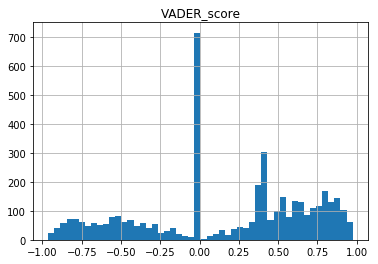

In [45]:
data.hist('VADER_score', bins = 50)
plt.savefig('VADER_train.png',bbox_inches="tight")
plt.show()